<a href="https://colab.research.google.com/github/CentralLT/Sales_Forecast_Stores/blob/main/DNN_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
tf.__version__
import sklearn
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [7]:
XTrain = pd.read_parquet('/XTrain.parquet')
yTrain = pd.read_parquet('/yTrain.parquet')
XVal = pd.read_parquet('/XVal.parquet')
yVal = pd.read_parquet('/yVal.parquet')
XTest = pd.read_parquet('/XTest.parquet')
yTest = pd.read_parquet('/yTest.parquet')


from sklearn.preprocessing import Normalizer

transformer = Normalizer().fit(XTrain)
XTrain = Normalizer().transform(XTrain)
XVal = Normalizer().transform(XVal)
XTest = Normalizer().transform(XTest)

In [19]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)


n_features = XTrain.shape[1]

model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units = n_features*3, activation='relu'),
        tf.keras.layers.Dense(units = n_features, activation='relu'),
        tf.keras.layers.Dense(units = 1, activation='linear'),
        ])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch/10))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(optimizer=optimizer, metrics=['mse'], loss=tf.keras.losses.Huber())
history = model.fit(x=XTrain, y=yTrain.target, epochs=50, batch_size=2000, validation_data=(XVal, yVal.target), callbacks=[lr_schedule])
ypred = model.predict(XVal)
ypred = ypred.clip(0, 20)
print(sklearn.metrics.mean_squared_error(yVal.target, ypred, squared=False))

Epoch 1/50
5338/5338 [==============================] - 14s 3ms/step - loss: 0.2204 - mse: 1.5646 - val_loss: 0.1889 - val_mse: 1.3399
Epoch 2/50
5338/5338 [==============================] - 13s 2ms/step - loss: 0.2204 - mse: 1.5645 - val_loss: 0.1889 - val_mse: 1.3398
Epoch 3/50
5338/5338 [==============================] - 13s 3ms/step - loss: 0.2204 - mse: 1.5644 - val_loss: 0.1889 - val_mse: 1.3397
Epoch 4/50
5338/5338 [==============================] - 14s 3ms/step - loss: 0.2204 - mse: 1.5643 - val_loss: 0.1888 - val_mse: 1.3396
Epoch 5/50
5338/5338 [==============================] - 13s 3ms/step - loss: 0.2203 - mse: 1.5641 - val_loss: 0.1888 - val_mse: 1.3394
Epoch 6/50
5338/5338 [==============================] - 13s 3ms/step - loss: 0.2203 - mse: 1.5639 - val_loss: 0.1888 - val_mse: 1.3392
Epoch 7/50
5338/5338 [==============================] - 13s 2ms/step - loss: 0.2202 - mse: 1.5637 - val_loss: 0.1887 - val_mse: 1.3390
Epoch 8/50
5338/5338 [==============================] -

(1e-08, 0.0001, 0.2, 0.25)

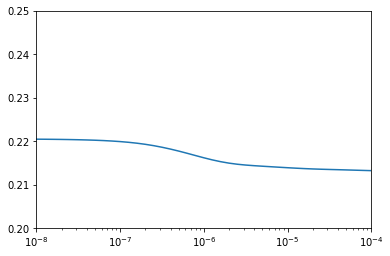

In [21]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0.2, 0.25])

In [22]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

n_features = XTrain.shape[1]

model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units = n_features*3, activation='relu'),
        tf.keras.layers.Dense(units = 1, activation='linear'),
        ])
optimizer = tf.keras.optimizers.SGD(lr=9e-6, momentum=0.9)
model.compile(optimizer=optimizer, metrics=['mse'], loss=tf.keras.losses.Huber())
history = model.fit(x=XTrain, y=yTrain.target, epochs=400, batch_size=2000, validation_data=(XVal, yVal.target))
ypred = model.predict(XVal)
ypred = ypred.clip(0, 20)
print(sklearn.metrics.mean_squared_error(yVal.target, ypred, squared=False))

Epoch 1/400
5338/5338 [==============================] - 14s 3ms/step - loss: 0.2147 - mse: 1.5172 - val_loss: 0.1849 - val_mse: 1.3006
Epoch 2/400
5338/5338 [==============================] - 14s 3ms/step - loss: 0.2144 - mse: 1.5182 - val_loss: 0.1846 - val_mse: 1.3002
Epoch 3/400
5338/5338 [==============================] - 14s 3ms/step - loss: 0.2142 - mse: 1.5181 - val_loss: 0.1844 - val_mse: 1.2996
Epoch 4/400
5338/5338 [==============================] - 14s 3ms/step - loss: 0.2140 - mse: 1.5178 - val_loss: 0.1843 - val_mse: 1.2990
Epoch 5/400
5338/5338 [==============================] - 14s 3ms/step - loss: 0.2139 - mse: 1.5175 - val_loss: 0.1842 - val_mse: 1.2985
Epoch 6/400
5338/5338 [==============================] - 13s 3ms/step - loss: 0.2138 - mse: 1.5172 - val_loss: 0.1841 - val_mse: 1.2981
Epoch 7/400
5338/5338 [==============================] - 14s 3ms/step - loss: 0.2137 - mse: 1.5170 - val_loss: 0.1840 - val_mse: 1.2977
Epoch 8/400
5338/5338 [=========================

<Figure size 432x288 with 0 Axes>

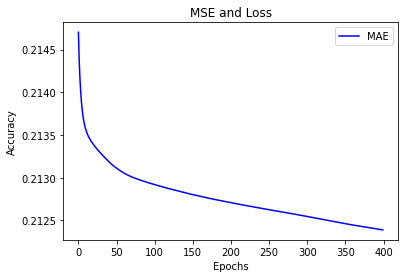

<Figure size 432x288 with 0 Axes>

In [27]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mae=history.history['mse']
loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs

#------------------------------------------------
# Plot MAE and Loss
#------------------------------------------------
#plt.plot(epochs, mae, 'r')
plt.plot(epochs, loss, 'b')
plt.title('MSE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

In [28]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

n_features = XTrain.shape[1]

model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units = n_features*3, activation='relu'),
        tf.keras.layers.Dense(units = n_features, activation='relu'),
        tf.keras.layers.Dense(units = 1, activation='linear'),
        ])
optimizer = tf.keras.optimizers.SGD(lr=9e-6, momentum=0.9)
model.compile(optimizer=optimizer, metrics=['mse'], loss=tf.keras.losses.Huber())
history = model.fit(x=XTrain, y=yTrain.target, epochs=100, batch_size=2000, validation_data=(XVal, yVal.target))
ypred = model.predict(XVal)
ypred = ypred.clip(0, 20)
print(sklearn.metrics.mean_squared_error(yVal.target, ypred, squared=False))

Epoch 1/100
5338/5338 [==============================] - 13s 2ms/step - loss: 0.2165 - mse: 1.5412 - val_loss: 0.1843 - val_mse: 1.3086
Epoch 2/100
5338/5338 [==============================] - 14s 3ms/step - loss: 0.2145 - mse: 1.5238 - val_loss: 0.1842 - val_mse: 1.3027
Epoch 3/100
5338/5338 [==============================] - 13s 3ms/step - loss: 0.2142 - mse: 1.5198 - val_loss: 0.1842 - val_mse: 1.3007
Epoch 4/100
5338/5338 [==============================] - 13s 2ms/step - loss: 0.2140 - mse: 1.5185 - val_loss: 0.1841 - val_mse: 1.2997
Epoch 5/100
5338/5338 [==============================] - 14s 3ms/step - loss: 0.2139 - mse: 1.5178 - val_loss: 0.1841 - val_mse: 1.2990
Epoch 6/100
5338/5338 [==============================] - 13s 2ms/step - loss: 0.2138 - mse: 1.5173 - val_loss: 0.1841 - val_mse: 1.2984
Epoch 7/100
5338/5338 [==============================] - 14s 3ms/step - loss: 0.2137 - mse: 1.5169 - val_loss: 0.1840 - val_mse: 1.2980
Epoch 8/100
5338/5338 [=========================